In [1]:
import tensorflow as tf

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt


In [4]:
from tensorflow import keras

In [11]:
#Load the datasets
data = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = data.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [13]:
#print the data
tf.print(data)

<module 'tensorflow.keras.datasets.fashion_mnist' from '/usr/local/lib/python3.6/dist-packages/tensorflow/keras/datasets/fashion_mnist/__init__.py'>


In [23]:
#Print the shape of train_images
train_images.shape

(60000, 28, 28)

In [24]:
#Print the size of the test_images
test_images.shape

(10000, 28, 28)

In [25]:
#Print the shape of the train_images
train_labels.shape

(60000,)

In [26]:
#Print the shape of the test_labels
test_labels.shape

(10000,)

In [27]:
#Print the train_labels
# There are 10 labels from 0 to 9
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

#Data processing

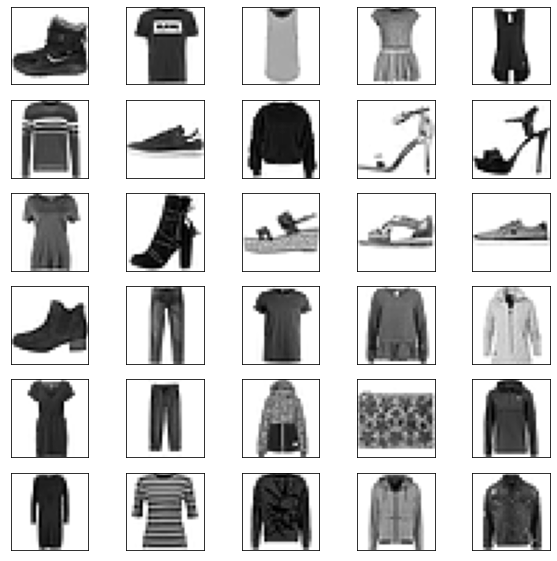

In [31]:
#print the data 
plt.figure (figsize = (10,10))
for i in range (30) :
  plt.subplot (6, 5, i+1)
  plt.xticks ( [] )
  plt.yticks ( [] )
  plt.grid (False)
  plt.imshow (train_images [i], cmap = plt.cm.binary)
plt.show()


In [32]:
#In the above plot we see that there is no class 
#Add the class names of the data 
class_name=['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

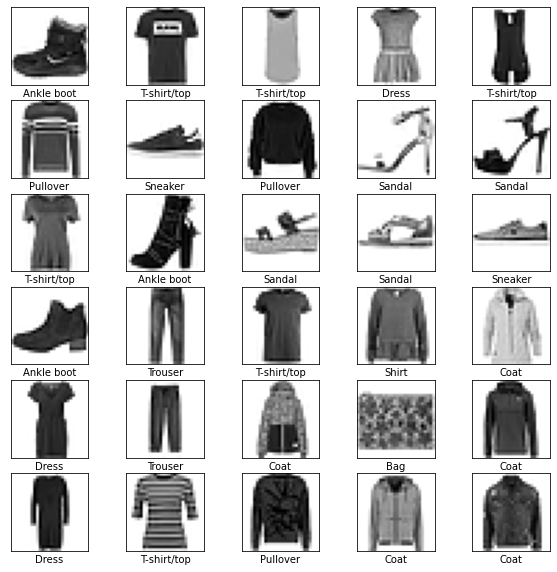

In [34]:
#plot the data with its proper class names 
plt.figure (figsize = (10, 10))
for i in range (30) :
  plt.subplot (6, 5, i+1)
  plt.xticks ( [] )
  plt.yticks ( [] )
  plt.grid (False)
  plt.imshow(train_images [i], cmap = plt.cm.binary)
  plt.xlabel(class_name [ train_labels [i] ])
plt.show()

In [35]:
#Scale these values in proper manner so these processed the neural network in the same ways
train_images = train_images/255
tets_images = test_images/255

#Plot the pixels range of the images

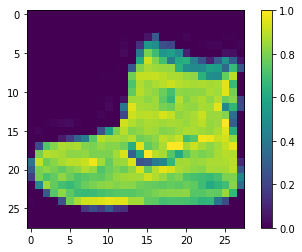

In [37]:
plt.figure ()
plt.imshow (train_images [0])
plt.colorbar ()
plt.grid(False)
plt.show()


#Build the Models

In [39]:
model = keras.Sequential([ keras.layers.Flatten(input_shape=(28, 28)), keras.layers.Dense(128, activation='relu'), keras.layers.Dense(10)])

#Compile the models

In [40]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

#Train the model

In [41]:
model.fit(train_images, train_labels, epochs=8)

Epoch 1/8
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6289 - accuracy: 0.7820
Epoch 2/8
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3891 - accuracy: 0.8591
Epoch 3/8
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3405 - accuracy: 0.8751
Epoch 4/8
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3155 - accuracy: 0.8862
Epoch 5/8
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2986 - accuracy: 0.8904
Epoch 6/8
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2878 - accuracy: 0.8937
Epoch 7/8
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2724 - accuracy: 0.8997
Epoch 8/8
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2548 - accuracy: 0.9047


In [42]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

313/313 - 0s - loss: 58.1695 - accuracy: 0.8629


In [43]:
test_acc

0.8629000186920166

In [44]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [45]:
predictions = probability_model.predict(test_images)

In [46]:
predictions[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [47]:
np.argmax(predictions[0])

9

In [48]:
test_labels[0]

9

In [56]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'green'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_name[predicted_label],
                                100*np.max(predictions_array),
                                class_name[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('green')

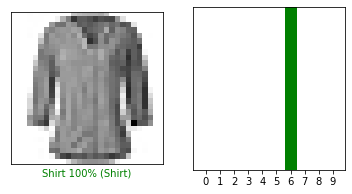

In [57]:
i = 4
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()